# Data Preparation for Value Addition in European Countries' Gross Data
- The main purpose of this analysis is to identify the reasons for the Value Addition of Gross from the Construction Sector in Ireland and Comparing with other European Countries

In [1]:
import pandas as pd
import plotly.express as plt
import plotly.graph_objects as go

In [2]:
eustat_original = pd.read_csv('GVA.csv')

In [3]:
eustat_original.head()

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,:,:,:,:,:,:,:,:,:,...,"18,713.50","19,008.00","19,294.00","19,678.40","20,149.90","21,767.40","22,628.00","22,019.80","24,298.90","26,484.10"
1,Bulgaria,:,:,:,:,:,:,:,:,:,...,"1,725.50","1,651.30","1,726.50","1,646.60","1,866.10","2,034.60","2,366.80","2,614.30","2,338.40","2,636.40"
2,Czechia,:,:,:,:,:,:,:,:,:,...,"8,215.70","8,048.30","8,636.50","8,721.30","9,547.70","10,630.70","11,489.50","11,088.60","12,110.80","14,423.30"
3,Denmark,"2,045.30","2,390.60","2,522.10","2,602.50","2,518.70","2,790.80","2,564.20","2,627.70","2,775.10",...,"10,145.20","10,532.70","11,749.90","13,380.40","14,328.80","14,828.70","14,716.50","14,860.20","16,275.10","19,183.40"
4,Germany,:,:,:,:,:,:,:,:,:,...,"112,226.00","119,583.00","124,907.00","132,548.00","137,994.00","148,044.00","154,323.00","167,329.00","179,802.00","211,102.00"


In [4]:
# Melt the dataset by 'Countries'
melted_eustat = pd.melt(eustat_original, id_vars='Country', var_name='Year', value_name='Gross Value Added (€M)')

# Sort the dataset by 'Country' and 'Year'
melted_eustat = melted_eustat.sort_values(['Country', 'Year']).reset_index(drop=True)

# Print the resulting melted dataset
melted_eustat.head(10)

,Country,Year,Gross Value Added (€M)
0,Albania,1975,:
1,Albania,1976,:
2,Albania,1977,:
3,Albania,1978,:
4,Albania,1979,:
5,Albania,1980,:
6,Albania,1981,:
7,Albania,1982,:
8,Albania,1983,:
9,Albania,1984,:


### Why Gross Value Added for the construction sector?
- GVA : Gross Value Added
- Gross Value Added (GVA) for the construction sector measures the value created by the industry. It reflects the difference between the value of goods and services produced and the cost of inputs used in the construction process. GVA is a vital indicator of economic performance and productivity within the construction sector. It helps determine the sector's contribution to the overall economy and provides insights into its growth and health. By subtracting the cost of materials and services from the total value of output, GVA represents the value added by the construction sector through production activities such as wages, profits, and other factors.

In [5]:
country_codes = pd.read_csv('country_codes.tsv', sep='\t')

In [6]:
# Merge the two datasets by 'Country'
eustat = pd.merge(melted_eustat, country_codes, left_on='Country', right_on='Country', how='left')
eustat.head()


,Country,Year,Gross Value Added (€M),Alpha-2 code,Alpha-3 code,Numeric
0,Albania,1975,:,AL,ALB,8
1,Albania,1976,:,AL,ALB,8
2,Albania,1977,:,AL,ALB,8
3,Albania,1978,:,AL,ALB,8
4,Albania,1979,:,AL,ALB,8


In [7]:
# Let's drop the Alpha-2 code and Numeric columns because we don't need them
eustat = eustat.drop(['Alpha-2 code', 'Numeric'], axis=1)
eustat.head()

,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,:,ALB
1,Albania,1976,:,ALB
2,Albania,1977,:,ALB
3,Albania,1978,:,ALB
4,Albania,1979,:,ALB


In [8]:
import numpy as np

# Let's convert the : to NaN
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'].replace(':', np.nan)  # Use np.nan, not 'NaN'

eustat.head()


,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,NaN,ALB
1,Albania,1976,NaN,ALB
2,Albania,1977,NaN,ALB
3,Albania,1978,NaN,ALB
4,Albania,1979,NaN,ALB


In [9]:
# Let's convert the Year column to datetime
eustat['Year'] = pd.to_datetime(eustat['Year'])

# Let's make the Year column format to YYYY
eustat['Year'] = eustat['Year'].dt.year

eustat.head()



,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,NaN,ALB
1,Albania,1976,NaN,ALB
2,Albania,1977,NaN,ALB
3,Albania,1978,NaN,ALB
4,Albania,1979,NaN,ALB


In [10]:
# Change the name of the column of "Alpha-3 code" to "Country Code"
eustat = eustat.rename(columns={'Alpha-3 code': 'Country Code'})

In [11]:
eustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 1680 non-null   object
 1   Year                    1680 non-null   int32 
 2   Gross Value Added (€M)  1046 non-null   object
 3   Country Code            1680 non-null   object
dtypes: int32(1), object(3)
memory usage: 46.1+ KB


In [12]:
# Let's convert the GVA column to float type
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'].str.replace(',', '').astype(float)

eustat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1680 non-null   object 
 1   Year                    1680 non-null   int32  
 2   Gross Value Added (€M)  1046 non-null   float64
 3   Country Code            1680 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 46.1+ KB


In [13]:
eustat.sample()

,Country,Year,Gross Value Added (€M),Country Code
682,Hungary,1985,NaN,HUN


In [14]:
# Let's make the GVA column format to millions
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'] * 1000000
eustat.sample(5)


,Country,Year,Gross Value Added (€M),Country Code
253,Croatia,1988,NaN,HRV
1127,Netherlands,1998,1.756680e+10,NLD
1366,Serbia,1997,1.144700e+09,SRB
1320,Romania,1999,1.757500e+09,ROU
723,Iceland,1978,NaN,ISL


In [15]:
# In the dataset GVA was in thousands, so we multiplied it by 1000000 to make it in millions. So let's change the name of the column to "Gross Value Added (€M)"
# We do not need to say "in millions" because we already multiplied it by 1000000
eustat = eustat.rename(columns={'Gross Value Added (€M)': 'Gross Value Added'})


In [16]:
eustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1680 non-null   object 
 1   Year               1680 non-null   int32  
 2   Gross Value Added  1046 non-null   float64
 3   Country Code       1680 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 46.1+ KB


In [17]:
# Install missingno if you don't have it in your enviroment
# pip install missingno

In [18]:
# My dataset is small I could have a look at it manually but I'd rather use a the missingno library to visualize the missing data for better understanding
# And with plotly express I can visualize the correlation of missing data between columns
import missingno as msno
import plotly.express as px

def display_missing(eustat):
    # Visualize the correlation of missing data between columns
    fig = px.imshow(eustat.isnull().T, labels=dict(x="Columns", y="Rows"), color_continuous_scale=["lightyellow", "darkblue"])

    # Set the title of the figure
    fig.update_layout(title="Missing Data Correlation Matrix for EUSTAT")

    # Change the position of the x-axis labels
    fig.update_xaxes(side="bottom")

    # Change the x-axis label rotation to 0 degrees
    fig.update_xaxes(tickangle=0)

    # Show the plot
    fig.show()

display_missing(eustat)

In [19]:
# Let's interpolate the missing values with linear interpolation to keep the trend of the data and fill the missing values
eustat['Gross Value Added'] = eustat['Gross Value Added'].interpolate(method='linear', limit_direction='forward')

In [20]:
display_missing(eustat)

# DISPLAYING VALUE ADDITION 

In [21]:
import plotly.express as px

# Calculate the minimum and maximum values of the 'Gross Value Added (€M)' column
min_value = eustat['Gross Value Added'].min()
max_value = eustat['Gross Value Added'].max()

# Create a choropleth map using the 'eustat' DataFrame, with countries represented by their country codes, and colors based on 'Gross Value Added (€M)'
fig = px.choropleth(
    eustat,
    locations='Country Code',
    hover_name='Country',
    color_continuous_scale='plasma',
    animation_frame='Year',
    color='Gross Value Added',
    title='GVA for Construction Sector',
    range_color=(min_value, max_value)
)

# Update the layout of the figure, including the title and the geographic projection
fig.update_layout(
    title_text='Gross Value Added for Construction Sector in Europe',
    geo=dict(
        scope='europe',
        projection_type='natural earth'
    ),
)

fig.show()


In [22]:
# Let's drop the missing values for further analysis
eustat_nomissing = eustat.dropna()

# Let's check if there are any missing values left
eustat_nomissing.isnull().sum()

Country              0
Year                 0
Gross Value Added    0
Country Code         0
dtype: int64

In [23]:
eustat_nomissing.head()

,Country,Year,Gross Value Added,Country Code
21,Albania,1996,179500000.0,ALB
22,Albania,1997,172700000.0,ALB
23,Albania,1998,163400000.0,ALB
24,Albania,1999,259100000.0,ALB
25,Albania,2000,428500000.0,ALB


In [24]:
# Let's see the highest GVA for each country
eustat.groupby('Country')['Gross Value Added'].max().sort_values(ascending=False).head()

Country
Germany           2.111020e+11
Greece            2.013017e+11
United Kingdom    1.513309e+11
France            1.292350e+11
Spain             1.155490e+11
Name: Gross Value Added, dtype: float64

## The main purpose of this analysis is to identify the reasons for the Value Addition of Gross from the Construction Sector in Ireland and Comparing with other European Countrias

Second of all we will prepare the datasets;

- Planning Permissions in All types of Construction in Ireland
- New and Second Hand House Prices in Ireland
- Persons aged 15 years and over in Employment in Construction of Buildings
- House Building Cost (1991=100)
- Census Population
- Value Addition of Gross from the Construction Sector in Ireland

# Optimizing Data Preparation for Construction Data in Ireland

## Number of Planning Permission Granted

- Displaying missing values
- Handling missing values with interpolation

In [25]:
planning_permission = pd.read_csv('Planning Permission Granted.csv')

In [26]:
planning_permission.head()

,Year,Total Floor Area for which Permission Granted(All types of Construction)
0,1977,NaN
1,1978,NaN
2,1979,NaN
3,1980,NaN
4,1981,NaN


In [27]:
# Let's change the name of Total Floor Area for which Permission Granted(All types of Construction) column to Construction Permission
planning_permission = planning_permission.rename(columns={'Total Floor Area for which Permission Granted(All types of Construction)': 'Construction Permission'})
planning_permission.sample()

,Year,Construction Permission
12,1989,NaN


In [28]:
permission_granted = 'Construction Permission'

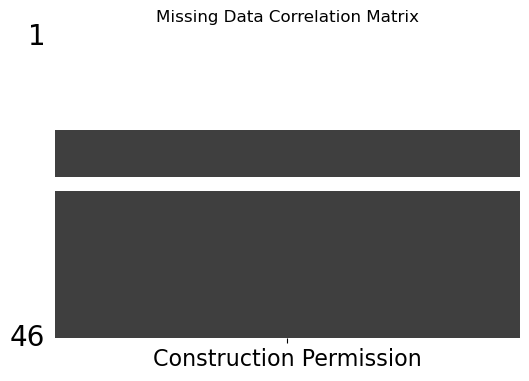

In [29]:
import matplotlib.pyplot as plt
import missingno as msno

# Set the figure size
fig, axes = plt.subplots(figsize=(6, 4))

# Visualize the correlation of missing data between columns
msno.matrix(planning_permission[permission_granted].to_frame(), ax=axes, sparkline=False)

# Set the title of the figure
plt.title('Missing Data Correlation Matrix')

# Change the position of the xticks labels
plt.gca().xaxis.tick_bottom()

# Change the x-axis label rotation to 0 degrees
plt.xticks(rotation=0, ha='center')

# Display the visualization
plt.show()


- As we see in the missing data correlation matrix; there are few missing values, to handle this issue interpolation is one of the technique can be useful in this case

In [30]:
planning_permission.tail()

,Year,Construction Permission
41,2018,7458.0
42,2019,8233.0
43,2020,8033.0
44,2021,8542.0
45,2022,7202.0


In [31]:
# Let's make interpolation for the missing values
planning_permission = planning_permission.interpolate()

planning_permission.head()

,Year,Construction Permission
0,1977,NaN
1,1978,NaN
2,1979,NaN
3,1980,NaN
4,1981,NaN


In [32]:
planning_permission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     46 non-null     int64  
 1   Construction Permission  31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 864.0 bytes


In [33]:
# Let's fill the missing values with 0 to make the column type integer
planning_permission['Construction Permission'].fillna(0, inplace=True) # Let's fill the missing values with 0

In [34]:
# Let's change the Total Floor Area column to int type
planning_permission['Construction Permission'] = planning_permission['Construction Permission'].astype(int)

In [35]:
# Let's convert the Year column to datetime and make the format YYYY before converting it to period
planning_permission['Year'] = pd.to_datetime(planning_permission['Year'], format='%Y').dt.to_period('Y') 

In [36]:
# Let's set the Year column as index column
planning_permission.set_index('Year', inplace=True) 


In [37]:
planning_permission.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 46 entries, 1977 to 2022
Freq: A-DEC
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Construction Permission  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


In [38]:
planning_permission.tail()

,Construction Permission
Year,
2018,7458
2019,8233
2020,8033
2021,8542
2022,7202


In [39]:
# Resample the data into quarterly frequency and fill the missing values with NaN
planning_permission = planning_permission.resample('Q').asfreq()

In [40]:
# Interpolate the missing values within each quarter using linear interpolation method 
planning_permission.interpolate(method='linear', inplace=True)

In [41]:
planning_permission.head()

,Construction Permission
Year,
1977Q1,0.0
1977Q2,0.0
1977Q3,0.0
1977Q4,0.0
1978Q1,0.0


In [42]:
# Let's change the name of Total Floor Area for which Permission Granted(All types of Construction) column to Construction Permission
planning_permission = planning_permission.rename(columns={'Total Floor Area for which Permission Granted(All types of Construction)': 'Construction Permission'})
planning_permission.sample()

,Construction Permission
Year,
1987Q4,0.0


# New and Second Hand House Prices in Ireland
- New and second house prices are shown in Euro on quarterly based.

In [43]:
house_prices = pd.read_csv('New House Prices in Ireland.csv')

In [44]:
house_prices.tail()

,Quarter,New House Prices in IE (€),Second Hand House Prices(€)
163,2015Q4,298551,263616.0
164,2016Q1,309703,264258.0
165,2016Q2,314950,277452.0
166,2016Q3,304307,276759.0
167,2016Q4,322680,284348.0


In [45]:
house_prices.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Quarter                      168 non-null    object 
 1   New House Prices in IE (€)   168 non-null    int64  
 2   Second Hand House Prices(€)  156 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [46]:
# Let's change the name of Second Hand House Prices column to Second Hand House Prices in IE(€)
house_prices = house_prices.rename(columns={'Second Hand House Prices(€)': 'Second Hand House Prices in IE(€)'})

In [47]:
# Let's convert the New House Prices column to int type
house_prices['New House Prices in IE (€)'] = house_prices['New House Prices in IE (€)'].astype(int)

In [48]:
# replace non-finite values with 0
house_prices['Second Hand House Prices in IE(€)'].fillna(0, inplace=True)

In [49]:
# Let's convert the Second-Hand House Prices column to int type
house_prices['Second Hand House Prices in IE(€)'] = house_prices['Second Hand House Prices in IE(€)'].astype(int)

In [50]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Quarter                            168 non-null    object
 1   New House Prices in IE (€)         168 non-null    int64 
 2   Second Hand House Prices in IE(€)  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [51]:
# Let's change the name of Quarter column to Year
house_prices = house_prices.rename(columns={'Quarter': 'Year'})

In [52]:
# Convert the 'Year' column to period with fiscal year ending in December ([Q-DEC])
house_prices['Year'] = pd.PeriodIndex(house_prices['Year'], freq='Q-DEC')

house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype        
---  ------                             --------------  -----        
 0   Year                               168 non-null    period[Q-DEC]
 1   New House Prices in IE (€)         168 non-null    int64        
 2   Second Hand House Prices in IE(€)  168 non-null    int64        
dtypes: int64(2), period[Q-DEC](1)
memory usage: 4.1 KB


In [53]:
house_prices.head()

,Year,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1975Q1,11887,0
1,1975Q2,12837,0
2,1975Q3,13269,0
3,1975Q4,13892,0
4,1976Q1,14738,0


# Labour Force(Persons aged 15 years and over in Employment in Construction of Buildings)
- The data is in Thousands and multiplication will be applied for further analysis
- The dataset is just including Construction Sector in Ireland and the persons who aged over 15 years old.

In [54]:
labour_force = pd.read_csv('Persons aged 15 years and over in Employment in Construction of Buildings(ILO).csv')

In [55]:
# Change the name of the Quarter column to Year
labour_force = labour_force.rename(columns={'Quarter': 'Year'})

In [56]:
# Convert the 'Year' column to period with fiscal year ending in December ([Q-DEC])
labour_force['Year'] = pd.PeriodIndex(labour_force['Year'], freq='Q-DEC')


In [57]:
labour_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype        
---  ------                                                                                      --------------  -----        
 0   Year                                                                                        100 non-null    period[Q-DEC]
 1   Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)  100 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.7 KB


In [58]:
labour_force.head()

,Year,Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)
0,1998Q1,45.1
1,1998Q2,46.4
2,1998Q3,50.6
3,1998Q4,50.9
4,1999Q1,52.9


In [59]:
# Rename the column
labour_force = labour_force.rename(columns={'Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)': 'Labour Force'})


In [60]:
labour_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   Year          100 non-null    period[Q-DEC]
 1   Labour Force  100 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.7 KB


In [61]:
# Let's multiply the Labour Force column by 1000 to make it in thousands
labour_force['Labour Force'] = labour_force['Labour Force'] * 1000

In [62]:
labour_force.head()

,Year,Labour Force
0,1998Q1,45100.0
1,1998Q2,46400.0
2,1998Q3,50600.0
3,1998Q4,50900.0
4,1999Q1,52900.0


In [63]:
# Let's change Labour Force column to int type
labour_force['Labour Force'] = labour_force['Labour Force'].astype(int)

# House Building Cost Index
The House Building Cost Index monitors labour costs in the construction industry and the cost of building materials. It does not include items such as overheads, profit, interest charges or land development. The labour costs include insurance cover and the building material costs include V.A.T. The type of construction covered is a typical 3 bed-roomed, 2 level local authority house and the index is applied on a national basis. This index is produced by Dublin City Council on behalf of Department of Environment, Heritage and Local Government. Post October 2006:The name change from the House Building Cost Index to the House Construction Cost Index was introduced in October 2006 when the method of assessing the materials sub-index was changed from pricing a basket of materials (representative of a typical 2 storey 3 bedroomed local authority house) to the CSO Table 3 Wholesale Price Index. The new Index does maintains continuity with the old HBCI.
- The dataset is based on 1991=100. In the further analysis it will be 1975=100 which is the first row of the dataset.
- The dataset will be interpolate on quarterly basis to adjust other dataset for Machine Learning models

In [64]:
building_cost = pd.read_csv('House Construction Cost.csv')

In [65]:
building_cost.head()

,Year,House Construction Cost
0,1975,20.0
1,1976,22.9
2,1977,26.9
3,1978,29.6
4,1979,34.2


In [66]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     42 non-null     int64  
 1   House Construction Cost  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [67]:
# Let's change the type of the Year column to datetime
building_cost['Year'] = pd.to_datetime(building_cost['Year'], format='%Y').dt.to_period('Y')

In [68]:
building_cost.head()

,Year,House Construction Cost
0,1975,20.0
1,1976,22.9
2,1977,26.9
3,1978,29.6
4,1979,34.2


In [69]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     42 non-null     period[A-DEC]
 1   House Construction Cost  42 non-null     float64      
dtypes: float64(1), period[A-DEC](1)
memory usage: 800.0 bytes


### Normalizing the data based on 1975 instead of 1991

In [70]:
# Normalizing based on the cost in 1975
base_year_cost = building_cost.loc[building_cost['Year'] == pd.Period('1975', 'A-DEC'), 'House Construction Cost'].values[0]
building_cost['House Construction Cost'] = (building_cost['House Construction Cost'] / base_year_cost) * 100
building_cost.head()

,Year,House Construction Cost
0,1975,100.0
1,1976,114.5
2,1977,134.5
3,1978,148.0
4,1979,171.0


In [71]:
# Let's set the Year column as index column
building_cost.set_index('Year', inplace=True)

# Resampling the DataFrame to quarterly periods and interpolating missing values
building_cost = building_cost.resample('Q').interpolate()

# Resetting the index
building_cost.reset_index(inplace=True)

building_cost.head()

,Year,House Construction Cost
0,1975Q1,100.000
1,1975Q2,103.625
2,1975Q3,107.250
3,1975Q4,110.875
4,1976Q1,114.500


- Now that dataset is on quarterly and based on 1975 instead of 1991 for better linearity and also interpolated for Machine Learning.

In [72]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     168 non-null    period[Q-DEC]
 1   House Construction Cost  168 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 2.8 KB


# Census Population Dataset
- Starts from 1979 to 2022
- The dataset will be interpolated Quarterly for Machine Learning

In [73]:
population = pd.read_csv('Census Population.csv')

In [74]:
population.head(10)

,Census Year,Ireland Population
0,1979,3368217
1,1981,3443405
2,1986,3540643
3,1991,3525719
4,1996,3626087
5,2002,3917203
6,2006,4239848
7,2011,4588252
8,2016,4761865
9,2022,5123536


In [75]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Census Year         10 non-null     int64
 1   Ireland Population  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [76]:
# Let's change the name of Census Year column to Year
population = population.rename(columns={'Census Year': 'Year'})

In [77]:
# Converting 'Census Year' to a PeriodIndex
population['Year'] = pd.PeriodIndex(population['Year'], freq='Q-DEC')

In [78]:
# Resampling the DataFrame to quarterly periods and interpolating missing values
population.set_index('Year', inplace=True)
population = population.resample('Q').interpolate()

In [79]:
population.head()

,Ireland Population
Year,
1979Q1,3368217.0
1979Q2,3377615.5
1979Q3,3387014.0
1979Q4,3396412.5
1980Q1,3405811.0


In [80]:
# Let's change the type of the Population column to int
population['Ireland Population'] = population['Ireland Population'].astype(int)

In [81]:
population.head()

,Ireland Population
Year,
1979Q1,3368217
1979Q2,3377615
1979Q3,3387014
1979Q4,3396412
1980Q1,3405811


### Census Population dataset is ready for further analysis
- Quarterly Interpolated
- Column types are adjusted

# Assessing the Value Added by the Construction Sector in Ireland

In [82]:
gva_ie = pd.read_csv('GVA in IE.csv')

In [83]:
gva_ie.head()

,Year,GVA in IE
0,1975,NaN
1,1976,NaN
2,1977,NaN
3,1978,NaN
4,1979,NaN


In [84]:
# Let's change the type of the Year column to period
gva_ie['Year'] = pd.to_datetime(gva_ie['Year'], format='%Y').dt.to_period('Y')

- Display the missing values

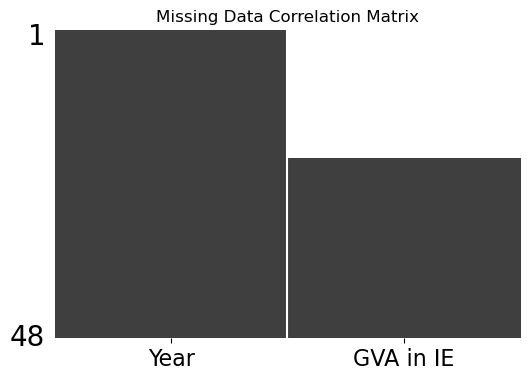

In [85]:
# Set the figure size
fig, axes = plt.subplots(figsize=(6, 4))

# Visualize the correlation of missing data between columns
msno.matrix(gva_ie, ax=axes, sparkline=False)

# Set the title of the figure
plt.title('Missing Data Correlation Matrix')

# Change the position of the xticks labels
plt.gca().xaxis.tick_bottom()

# Change the x-axis label rotation to 0 degrees
plt.xticks(rotation=0, ha='center')

# Display the visualization
plt.show()

- Past year data is missing but from starting point to ending point there is no missing data so filling the missing values is not necessary in this case

In [86]:
# Let's change the "," to "." in the GVA in IE column
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace(',', '.')

In [87]:
gva_ie.sample(10)

,Year,GVA in IE
3,1978,NaN
41,2016,5.734.50
38,2013,3.477.50
6,1981,NaN
1,1976,NaN
20,1995,2.822.90
14,1989,NaN
33,2008,11.049.20
34,2009,4.170.50
40,2015,4.908.80


In [88]:
# Drop rows with missing values in the 'GVA in IE' column
gva_ie = gva_ie.dropna(subset=['GVA in IE'])


In [89]:
# Remove non-numeric characters and convert the 'GVA in IE' column to float
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace('[^\d.]', '', regex=True)

In [90]:
gva_ie.head()

,Year,GVA in IE
20,1995,2.822.90
21,1996,3.162.40
22,1997,3.963.00
23,1998,4.604.50
24,1999,5.582.90


In [91]:
# Remove non-numeric characters and convert the 'GVA in IE' column to float specifically for the "."
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace('.', '', regex=False).astype(float)

In [92]:
# Let's change the type of the GVA in IE column to float
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].astype(int)

In [93]:
gva_ie.head()

,Year,GVA in IE
20,1995,282290
21,1996,316240
22,1997,396300
23,1998,460450
24,1999,558290


In [94]:
gva_ie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 20 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   Year       28 non-null     period[A-DEC]
 1   GVA in IE  28 non-null     int64        
dtypes: int64(1), period[A-DEC](1)
memory usage: 672.0 bytes


In [95]:
# Resampling the DataFrame to quarterly periods and interpolating missing values
gva_ie.set_index('Year', inplace=True)

# Interpolate the missing values within each quarter using linear interpolation method
gva_ie = gva_ie.resample('Q').interpolate()

gva_ie.head(10)

,GVA in IE
Year,
1995Q1,282290.0
1995Q2,290777.5
1995Q3,299265.0
1995Q4,307752.5
1996Q1,316240.0
1996Q2,336255.0
1996Q3,356270.0
1996Q4,376285.0
1997Q1,396300.0


# Merge the datasets for hypothesis test, visualisation and machine learning

- Planning Permission and Building Cost

In [96]:
# Let's merge the planning_permission and house_prices DataFrames
permissions_n_cost = pd.merge(planning_permission, building_cost, on='Year', how='outer')

permissions_n_cost.head()

,Year,Construction Permission,House Construction Cost
0,1977Q1,0.0,134.500
1,1977Q2,0.0,137.875
2,1977Q3,0.0,141.250
3,1977Q4,0.0,144.625
4,1978Q1,0.0,148.000


- Planning Permission, House Building Cost and Population

In [97]:
permissions_n_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     192 non-null    period[Q-DEC]
 1   Construction Permission  184 non-null    float64      
 2   House Construction Cost  168 non-null    float64      
dtypes: float64(2), period[Q-DEC](1)
memory usage: 4.6 KB


In [98]:
population.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 173 entries, 1979Q1 to 2022Q1
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Ireland Population  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [99]:
# Let's merge the permissions_n_cost and population DataFrames
permissions_n_cost_n_population = pd.merge(permissions_n_cost, population, on='Year', how='outer')

permissions_n_cost_n_population.head()

,Year,Construction Permission,House Construction Cost,Ireland Population
0,1977Q1,0.0,134.500,NaN
1,1977Q2,0.0,137.875,NaN
2,1977Q3,0.0,141.250,NaN
3,1977Q4,0.0,144.625,NaN
4,1978Q1,0.0,148.000,NaN


In [100]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour = pd.merge(permissions_n_cost_n_population, labour_force, on='Year', how='outer')

In [101]:
permissions_n_cost_n_population_n_labour.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force
0,1977Q1,0.0,134.500,NaN,NaN
1,1977Q2,0.0,137.875,NaN,NaN
2,1977Q3,0.0,141.250,NaN,NaN
3,1977Q4,0.0,144.625,NaN,NaN
4,1978Q1,0.0,148.000,NaN,NaN


In [102]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour_n_gva = pd.merge(permissions_n_cost_n_population_n_labour, gva_ie, on='Year', how='outer')

permissions_n_cost_n_population_n_labour_n_gva.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE
0,1977Q1,0.0,134.500,NaN,NaN,NaN
1,1977Q2,0.0,137.875,NaN,NaN,NaN
2,1977Q3,0.0,141.250,NaN,NaN,NaN
3,1977Q4,0.0,144.625,NaN,NaN,NaN
4,1978Q1,0.0,148.000,NaN,NaN,NaN


In [103]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour_n_gva_n_house_prices = pd.merge(permissions_n_cost_n_population_n_labour_n_gva, house_prices, on='Year', how='outer')

In [104]:
permissions_n_cost_n_population_n_labour_n_gva_n_house_prices.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1977Q1,0.0,134.500,NaN,NaN,NaN,17149.0,0.0
1,1977Q2,0.0,137.875,NaN,NaN,NaN,18165.0,0.0
2,1977Q3,0.0,141.250,NaN,NaN,NaN,19436.0,0.0
3,1977Q4,0.0,144.625,NaN,NaN,NaN,20042.0,0.0
4,1978Q1,0.0,148.000,NaN,NaN,NaN,22388.0,19320.0


In [105]:
# Let's change the name of the dataframe to gva_factors
gva_factors = permissions_n_cost_n_population_n_labour_n_gva_n_house_prices
gva_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype        
---  ------                             --------------  -----        
 0   Year                               192 non-null    period[Q-DEC]
 1   Construction Permission            184 non-null    float64      
 2   House Construction Cost            168 non-null    float64      
 3   Ireland Population                 173 non-null    float64      
 4   Labour Force                       100 non-null    float64      
 5   GVA in IE                          112 non-null    float64      
 6   New House Prices in IE (€)         168 non-null    float64      
 7   Second Hand House Prices in IE(€)  168 non-null    float64      
dtypes: float64(7), period[Q-DEC](1)
memory usage: 12.1 KB


In [106]:
# Let's change the 0.0 values to NaN
gva_factors = gva_factors.replace(0.0, np.nan)

In [107]:
gva_factors.tail(10)

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
182,2022Q3,7202.0,NaN,NaN,67700.0,1105130.0,NaN,NaN
183,2022Q4,7202.0,NaN,NaN,63300.0,1105130.0,NaN,NaN
184,1975Q1,NaN,100.000,NaN,NaN,NaN,11887.0,NaN
185,1975Q2,NaN,103.625,NaN,NaN,NaN,12837.0,NaN
186,1975Q3,NaN,107.250,NaN,NaN,NaN,13269.0,NaN
187,1975Q4,NaN,110.875,NaN,NaN,NaN,13892.0,NaN
188,1976Q1,NaN,114.500,NaN,NaN,NaN,14738.0,NaN
189,1976Q2,NaN,119.500,NaN,NaN,NaN,15250.0,NaN
190,1976Q3,NaN,124.500,NaN,NaN,NaN,15549.0,NaN
191,1976Q4,NaN,129.500,NaN,NaN,NaN,17130.0,NaN


In [108]:
# Rearrange the rows in the DataFrame
gva_factors = pd.concat([gva_factors.tail(8), gva_factors.iloc[:-8]])

# Reset the index
gva_factors = gva_factors.reset_index(drop=True)

gva_factors.tail()


,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
187,2021Q4,7537.0,NaN,5108466.0,68600.0,1046792.5,NaN,NaN
188,2022Q1,7202.0,NaN,5123536.0,59300.0,1105130.0,NaN,NaN
189,2022Q2,7202.0,NaN,NaN,63800.0,1105130.0,NaN,NaN
190,2022Q3,7202.0,NaN,NaN,67700.0,1105130.0,NaN,NaN
191,2022Q4,7202.0,NaN,NaN,63300.0,1105130.0,NaN,NaN


In [109]:
gva_factors.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1975Q1,NaN,100.000,NaN,NaN,NaN,11887.0,NaN
1,1975Q2,NaN,103.625,NaN,NaN,NaN,12837.0,NaN
2,1975Q3,NaN,107.250,NaN,NaN,NaN,13269.0,NaN
3,1975Q4,NaN,110.875,NaN,NaN,NaN,13892.0,NaN
4,1976Q1,NaN,114.500,NaN,NaN,NaN,14738.0,NaN


In [110]:
# Let's import the gva_factors dataset to a csv file
gva_factors.to_csv('gva_factors.csv', index=False)

In [111]:
import plotly.express as px

# Visualize the correlation of missing data between columns
fig = px.imshow(gva_factors.isnull().T, labels=dict(x="Columns", y="Rows"), color_continuous_scale=["darkblue", "lightyellow"])

# Set the title of the figure
fig.update_layout(title="Missing Data Correlation Matrix")

# Change the position of the x-axis labels
fig.update_xaxes(side="bottom")

# Change the x-axis label rotation to 0 degrees
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()


- There are many missing values in our dataset and for better and accurate analysis missing values must be cleaned

In [112]:
# Let's make the Year column the index of the DataFrame
gva_factors.set_index('Year', inplace=True)

In [113]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create a copy of the original DataFrame
imputed_df = gva_factors.copy()

# Select the columns with missing values
columns_with_missing = ['Construction Permission', 'House Construction Cost', 'Ireland Population', 'Labour Force', 'GVA in IE', 'New House Prices in IE (€)', 'Second Hand House Prices in IE(€)']

# Select only the rows with missing values in the specified columns
missing_rows = imputed_df[columns_with_missing].isnull().any(axis=1)

# Interpolate the missing values in the selected rows and columns using linear interpolation method
imputed_df.loc[missing_rows, columns_with_missing] = imputed_df.loc[missing_rows, columns_with_missing].interpolate(method='linear', axis=0)

# Create a mask for missing values
missing_mask = imputed_df[columns_with_missing].isnull().values

# Convert DataFrame to array for imputation
imputation_array = imputed_df[columns_with_missing].values

# Perform multiple imputation only on missing values
imputer = IterativeImputer(sample_posterior=True, max_iter=10, initial_strategy='mean')
imputed_array = imputer.fit_transform(imputation_array)

# Apply non-negativity constraint to imputed values
imputed_array = np.where(missing_mask & (imputed_array < 0), 0, imputed_array)

# Replace the imputed values in the DataFrame
imputed_df[columns_with_missing] = np.where(missing_mask, imputed_array, imputed_df[columns_with_missing])

# Print the first few rows of the imputed DataFrame
imputed_df.head()


,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744.216177,100.000,3.464737e+06,17757.584406,220068.525035,11887.0,13408.012831
1975Q2,0.000000,103.625,4.189338e+06,2725.899091,0.000000,12837.0,0.000000
1975Q3,14529.865444,107.250,3.042795e+06,28636.577494,586780.619576,13269.0,10658.814988
1975Q4,2381.033055,110.875,3.281209e+06,0.000000,0.000000,13892.0,0.000000
1976Q1,7728.349819,114.500,2.908488e+06,6484.210756,0.000000,14738.0,0.000000


In [114]:
# Replace the 0 values to NaN
imputed_df = imputed_df.replace(0, np.nan)

In [115]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537.0,618.875,5108466.0,68600.0,1046792.5,111981.0,115898.0
2022Q1,7202.0,618.875,5123536.0,59300.0,1105130.0,111981.0,115898.0
2022Q2,7202.0,618.875,5123536.0,63800.0,1105130.0,111981.0,115898.0
2022Q3,7202.0,618.875,5123536.0,67700.0,1105130.0,111981.0,115898.0
2022Q4,7202.0,618.875,5123536.0,63300.0,1105130.0,111981.0,115898.0


In [116]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 192 entries, 1975Q1 to 2022Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Construction Permission            184 non-null    float64
 1   House Construction Cost            192 non-null    float64
 2   Ireland Population                 192 non-null    float64
 3   Labour Force                       169 non-null    float64
 4   GVA in IE                          155 non-null    float64
 5   New House Prices in IE (€)         192 non-null    float64
 6   Second Hand House Prices in IE(€)  187 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


In [117]:
imputed_df = imputed_df.interpolate(method='linear', axis=0)

In [118]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744.216177,100.000,3.464737e+06,17757.584406,220068.525035,11887.0,13408.012831
1975Q2,12637.040810,103.625,4.189338e+06,2725.899091,403424.572305,12837.0,12033.413909
1975Q3,14529.865444,107.250,3.042795e+06,28636.577494,586780.619576,13269.0,10658.814988
1975Q4,2381.033055,110.875,3.281209e+06,17560.394125,587165.877698,13892.0,13128.573144
1976Q1,7728.349819,114.500,2.908488e+06,6484.210756,587551.135820,14738.0,15598.331300


In [119]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 192 entries, 1975Q1 to 2022Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Construction Permission            192 non-null    float64
 1   House Construction Cost            192 non-null    float64
 2   Ireland Population                 192 non-null    float64
 3   Labour Force                       192 non-null    float64
 4   GVA in IE                          192 non-null    float64
 5   New House Prices in IE (€)         192 non-null    float64
 6   Second Hand House Prices in IE(€)  192 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


In [120]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537.0,618.875,5108466.0,68600.0,1046792.5,111981.0,115898.0
2022Q1,7202.0,618.875,5123536.0,59300.0,1105130.0,111981.0,115898.0
2022Q2,7202.0,618.875,5123536.0,63800.0,1105130.0,111981.0,115898.0
2022Q3,7202.0,618.875,5123536.0,67700.0,1105130.0,111981.0,115898.0
2022Q4,7202.0,618.875,5123536.0,63300.0,1105130.0,111981.0,115898.0


In [121]:
# Check for NaN values in the DataFrame
nan_check = imputed_df.isna().any()

# Print columns with NaN values
columns_with_nan = nan_check[nan_check].index
print("Columns with NaN values:")
print(columns_with_nan)

# Check if any NaN values exist in the DataFrame
if nan_check.any():
    print("NaN values exist in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


Columns with NaN values:
Index([], dtype='object')
No NaN values found in the DataFrame.


In [122]:
# Handle the missing values in the DataFrame
imputed_df = imputed_df.interpolate(method='time', axis=0).ffill().bfill()

In [123]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744.216177,100.000,3.464737e+06,17757.584406,220068.525035,11887.0,13408.012831
1975Q2,12637.040810,103.625,4.189338e+06,2725.899091,403424.572305,12837.0,12033.413909
1975Q3,14529.865444,107.250,3.042795e+06,28636.577494,586780.619576,13269.0,10658.814988
1975Q4,2381.033055,110.875,3.281209e+06,17560.394125,587165.877698,13892.0,13128.573144
1976Q1,7728.349819,114.500,2.908488e+06,6484.210756,587551.135820,14738.0,15598.331300


In [124]:
# List of columns to round and convert to integers
columns_to_round = ['Construction Permission', 'House Construction Cost', 'Ireland Population',
                    'Labour Force', 'GVA in IE', 'New House Prices in IE (€)',
                    'Second Hand House Prices in IE(€)']

# Apply rounding and conversion to integers using a loop
for column in columns_to_round:
    imputed_df[column] = imputed_df[column].round().astype(int)

imputed_df.head()


,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744,100,3464737,17758,220069,11887,13408
1975Q2,12637,104,4189338,2726,403425,12837,12033
1975Q3,14530,107,3042795,28637,586781,13269,10659
1975Q4,2381,111,3281209,17560,587166,13892,13129
1976Q1,7728,114,2908488,6484,587551,14738,15598


In [125]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537,619,5108466,68600,1046792,111981,115898
2022Q1,7202,619,5123536,59300,1105130,111981,115898
2022Q2,7202,619,5123536,63800,1105130,111981,115898
2022Q3,7202,619,5123536,67700,1105130,111981,115898
2022Q4,7202,619,5123536,63300,1105130,111981,115898


In [126]:
# Drop the rows after 2017Q1 as they contain repeated values and can be biased for the analysis
imputed_df = imputed_df.drop(imputed_df.index[168:])

In [127]:
# Checking the last few rows of the DataFrame
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2015Q4,5372,1040,4753184,52200,552808,298551,263616
2016Q1,5543,1041,4761865,55600,573450,309703,264258
2016Q2,5662,1041,4776934,54400,617040,314950,277452
2016Q3,5781,1041,4792004,56000,660630,304307,276759
2016Q4,5900,1041,4807073,54900,704220,322680,284348


In [128]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 168 entries, 1975Q1 to 2016Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Construction Permission            168 non-null    int64
 1   House Construction Cost            168 non-null    int64
 2   Ireland Population                 168 non-null    int64
 3   Labour Force                       168 non-null    int64
 4   GVA in IE                          168 non-null    int64
 5   New House Prices in IE (€)         168 non-null    int64
 6   Second Hand House Prices in IE(€)  168 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


In [129]:
imputed_df.isnull().sum()

Construction Permission              0
House Construction Cost              0
Ireland Population                   0
Labour Force                         0
GVA in IE                            0
New House Prices in IE (€)           0
Second Hand House Prices in IE(€)    0
dtype: int64

In [130]:
# Reset the index to convert the year index into a regular column
imputed_df_reset = imputed_df.reset_index()

In [131]:
# Visualize the correlation of missing data between columns
fig = px.imshow(imputed_df_reset.isnull().T, labels=dict(x="Columns", y="Years"), color_continuous_scale=["darkblue", "lightyellow"])

# Set the title of the figure
fig.update_layout(title="Missing Data Correlation Matrix")

# Change the position of the x-axis labels
fig.update_xaxes(side="bottom")

# Change the x-axis label rotation to 0 degrees
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()


- Using imputed_df_reset just for showing the missing values, for further analysis imputed_df will be used

In [132]:
# Let's import the imputed_df dataset to a csv file
imputed_df.to_csv('imputed_df_last.csv', index=False)

# STATISTIC AND VISUALISATION

#### The existing dataframe has undergone imputation and linear interpolation techniques to handle missing values. The imputed values have been carefully generated using advanced algorithms. It is important to note that the subsequent analysis and interpretation will be conducted based on the imputed data, which includes synthetic values for the missing entries.

# HYPOTHESIS TESTS

## Paired T-test
- Compare the means of two related groups
- Since we have multiple countries, I will utilize the pingouin library to perform pairwise t-test calculations specifically tailored to Ireland.
- I am conducting pairwise t-tests despite the non-normal distribution of the dataset in order to assess the extent of their lack of relevance.

In [133]:
# If you don't have pingouin installed, uncomment the following line to install it
# pip install pingouin

- Contrast: The comparison being made between two countries.
- A, B: The countries being compared.
- Paired: Indicates whether the t-test is paired or not (in this case, it is False. When "paired" is set to False, it means that the samples are independent, and there is no inherent pairing or matching between them.)
- Parametric: Indicates whether parametric t-tests were used.
- T: The t-statistic value(Measure of the difference between the means of two groups in a t-test)
- Dof: Degrees of freedom.
- Alternative: The alternative hypothesis (two-sided in this case).
- p-unc: The uncorrected p-value.
- p-corr: The corrected p-value after applying Bonferroni correction.
- p-adjust: The adjusted p-value using the Bonferroni correction.
- BF10: Bayes Factor, providing evidence for or against the alternative hypothesis.(A BF10 greater than 1 indicates evidence in favor of the alternative hypothesis, while a BF10 less than 1 indicates evidence in favor of the null hypothesis. The magnitude of the BF10 indicates the strength of the evidence, with larger values indicating stronger evidence for the alternative hypothesis.)
- Hedges: Effect size measure (Hedges' g).

In [134]:
import pingouin as pg

In [135]:
# Perform pairwise t-tests
pairwise_comparison = pg.pairwise_ttests(data=eustat_nomissing, dv='Gross Value Added', between='Country', parametric=True, padjust='bonf')

# Print the pairwise comparison results
pairwise_comparison.head()


/opt/anaconda3/lib/python3.9/site-packages/pingouin/pairwise.py:28: UserWarning:

pairwise_ttests is deprecated, use pairwise_tests instead.



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Country,Albania,Austria,False,True,-13.438473,47.653161,two-sided,7.937896e-18,4.723048e-15,bonf,1.304e+18,-2.398164
1,Country,Albania,Belgium,False,True,-21.470463,47.883316,two-sided,3.206279e-26,1.907736e-23,bonf,4.813e+29,-3.834735
2,Country,Albania,Bosnia and Herzegovina,False,True,-5.228169,47.397646,two-sided,3.799098e-06,2.260463e-03,bonf,8951.332,-0.932123
3,Country,Albania,Bulgaria,False,True,-2.144097,72.751359,two-sided,3.536693e-02,1.000000e+00,bonf,1.714,-0.433890
4,Country,Albania,Croatia,False,True,-7.646402,70.820825,two-sided,7.664388e-11,4.560311e-08,bonf,1.041e+08,-1.630774


In [136]:
# Filter the dataset based on Ireland
ireland_data = pairwise_comparison[pairwise_comparison['A'] == 'Ireland']

# Print the filtered dataset
ireland_data.head()


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
424,Country,Ireland,Italy,False,True,-13.076911,94.0,two-sided,7.094335e-23,4.221129e-20,bonf,3.72e+19,-2.647959
425,Country,Ireland,Latvia,False,True,-3.547948,94.0,two-sided,6.079461e-04,3.617279e-01,bonf,45.598,-0.718428
426,Country,Ireland,Lithuania,False,True,6.156441,94.0,two-sided,1.818282e-08,1.081878e-05,bonf,5.642e+05,1.246625
427,Country,Ireland,Luxembourg,False,True,4.865921,94.0,two-sided,4.575575e-06,2.722467e-03,bonf,3497.493,0.985306
428,Country,Ireland,Malta,False,True,6.595833,94.0,two-sided,2.459582e-09,1.463451e-06,bonf,3.654e+06,1.335598


In [137]:
ireland_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 424 to 441
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Contrast     18 non-null     object 
 1   A            18 non-null     object 
 2   B            18 non-null     object 
 3   Paired       18 non-null     bool   
 4   Parametric   18 non-null     bool   
 5   T            18 non-null     float64
 6   dof          18 non-null     float64
 7   alternative  18 non-null     object 
 8   p-unc        18 non-null     float64
 9   p-corr       18 non-null     float64
 10  p-adjust     18 non-null     object 
 11  BF10         18 non-null     object 
 12  hedges       18 non-null     float64
dtypes: bool(2), float64(5), object(6)
memory usage: 1.7+ KB


In [138]:
# Format p-unc and p-corr columns to 3 decimal places and replace NaN values with 'NaN' string 
ireland_data.loc[:, 'p-unc'] = ireland_data['p-unc'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'NaN')
ireland_data.loc[:, 'p-corr'] = ireland_data['p-corr'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'NaN')

# Print the updated DataFrame 
ireland_data.head()


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
424,Country,Ireland,Italy,False,True,-13.076911,94.0,two-sided,0.000,0.000,bonf,3.72e+19,-2.647959
425,Country,Ireland,Latvia,False,True,-3.547948,94.0,two-sided,0.001,0.362,bonf,45.598,-0.718428
426,Country,Ireland,Lithuania,False,True,6.156441,94.0,two-sided,0.000,0.000,bonf,5.642e+05,1.246625
427,Country,Ireland,Luxembourg,False,True,4.865921,94.0,two-sided,0.000,0.003,bonf,3497.493,0.985306
428,Country,Ireland,Malta,False,True,6.595833,94.0,two-sided,0.000,0.000,bonf,3.654e+06,1.335598


- I will generate a new dataframe that categorizes the p-corrected values into "Highly Significant," "Significant," and "Insignificant" to facilitate a categorical view.

In [139]:
# Convert 'p-unc' and 'p-corr' columns to numeric types and coerce errors to NaN values
ireland_data['p-corr'] = pd.to_numeric(ireland_data['p-corr'], errors='coerce')

# Add 'P-value Category' column to the DataFrame based on the p-corr values 
# If p-corr is less than 0.01, then the category is 'Highly Significant'
# If p-corr is between 0.01 and 0.05, then the category is 'Significant'
# If p-corr is greater than 0.05, then the category is 'Insignificant'
ireland_data.loc[ireland_data['p-corr'] < 0.01, 'P-value Category'] = 'Highly Significant'
ireland_data.loc[(ireland_data['p-corr'] >= 0.01) & (ireland_data['p-corr'] <= 0.05), 'P-value Category'] = 'Significant'
ireland_data.loc[~((ireland_data['p-corr'] >= 0.01) & (ireland_data['p-corr'] <= 0.05)), 'P-value Category'] = 'Insignificant'

# Print the updated DataFrame
ireland_data[['Contrast', 'A', 'B', 'P-value Category']]


/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1555/3519038162.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1555/3519038162.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Contrast,A,B,P-value Category
424,Country,Ireland,Italy,Insignificant
425,Country,Ireland,Latvia,Insignificant
426,Country,Ireland,Lithuania,Insignificant
427,Country,Ireland,Luxembourg,Insignificant
428,Country,Ireland,Malta,Insignificant
429,Country,Ireland,Montenegro,Insignificant
430,Country,Ireland,Netherlands,Insignificant
431,Country,Ireland,Norway,Insignificant
432,Country,Ireland,Poland,Insignificant
433,Country,Ireland,Portugal,Insignificant


# Analysis of Variance (ANOVA)

- Analysis of variance (ANOVA) will be employed to compare the value addition for gross in Ireland with that of geographically proximate random European countries.
- I will preprocess the eustat_original DataFrame to make it suitable for ANOVA test. The overall structure of the DataFrame is fine, but it requires some organization and adjustments.
- Before diving into the detailed analysis, let's first take a look at the visualization of the dataframe to gain a clear understanding of its structure and contents.

In [140]:
eustat_T = eustat_original.T
eustat_T.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975,:,:,:,"2,045.30",:,:,:,:,:,"20,036.70",...,:,:,:,"1,453.40",:,:,:,:,:,:
1976,:,:,:,"2,390.60",:,:,:,:,:,"21,680.90",...,:,:,:,"1,714.50",:,:,:,:,:,:
1977,:,:,:,"2,522.10",:,:,:,:,:,"22,869.30",...,:,:,:,"1,957.60",:,:,:,:,:,:
1978,:,:,:,"2,602.50",:,:,:,:,:,"25,723.60",...,:,:,:,"2,112.50",:,:,:,:,:,:


In [141]:
# Let's pack the indeces into a column
eustat_T.reset_index(level=0, inplace=True)

# Let's replace the indeces with a new column name 'Year'
eustat_T.rename(columns={'index': 'Year'}, inplace=True)

# Let's check the first few rows of the DataFrame
eustat_T.head()

,Year,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [142]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    49 non-null     object
 1   0       49 non-null     object
 2   1       49 non-null     object
 3   2       49 non-null     object
 4   3       49 non-null     object
 5   4       49 non-null     object
 6   5       49 non-null     object
 7   6       49 non-null     object
 8   7       49 non-null     object
 9   8       49 non-null     object
 10  9       49 non-null     object
 11  10      49 non-null     object
 12  11      49 non-null     object
 13  12      49 non-null     object
 14  13      49 non-null     object
 15  14      49 non-null     object
 16  15      49 non-null     object
 17  16      49 non-null     object
 18  17      49 non-null     object
 19  18      49 non-null     object
 20  19      49 non-null     object
 21  20      49 non-null     object
 22  21      49 non-null     obje

In [143]:
# Let's check the indeces of the DataFrame
eustat_T.index

RangeIndex(start=0, stop=49, step=1)

In [144]:
eustat_T.head()

,Year,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [145]:
# Let's change the first row of the DataFrame with the column of the DataFrame
eustat_T.columns = eustat_T.iloc[0]

eustat_T.head()


,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [146]:
# Let's change the name of the first column to 'Year' but we will need to do this again this one is just for identifying the column
eustat_T.rename(columns={eustat_T.columns[0]: 'Year'}, inplace=True)

# Delete the first row of the DataFrame
eustat_T = eustat_T.iloc[1:]

# Set the year column as the index of the DataFrame
eustat_T.set_index('Year', inplace=True)

In [147]:
# Let's align the index and column names
eustat_T.index.name = None

In [148]:
# Set an index name for the DataFrame one last time to organise the dataframe
eustat_T.columns.name = "Year"

In [149]:
# Let's check the first few rows of the DataFrame
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975,:,:,:,"2,045.30",:,:,:,:,:,"20,036.70",...,:,:,:,"1,453.40",:,:,:,:,:,:
1976,:,:,:,"2,390.60",:,:,:,:,:,"21,680.90",...,:,:,:,"1,714.50",:,:,:,:,:,:
1977,:,:,:,"2,522.10",:,:,:,:,:,"22,869.30",...,:,:,:,"1,957.60",:,:,:,:,:,:
1978,:,:,:,"2,602.50",:,:,:,:,:,"25,723.60",...,:,:,:,"2,112.50",:,:,:,:,:,:
1979,:,:,:,"2,518.70",:,:,:,:,:,"28,587.40",...,:,:,:,"1,920.60",:,:,:,:,:,:


In [150]:
# Let's check the index of the DataFrame
eustat_T.index

Index(['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [151]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1975 to 2022
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Belgium                 48 non-null     object
 1   Bulgaria                48 non-null     object
 2   Czechia                 48 non-null     object
 3   Denmark                 48 non-null     object
 4   Germany                 48 non-null     object
 5   Estonia                 48 non-null     object
 6   Ireland                 48 non-null     object
 7   Greece                  48 non-null     object
 8   Spain                   48 non-null     object
 9   France                  48 non-null     object
 10  Croatia                 48 non-null     object
 11  Italy                   48 non-null     object
 12  Cyprus                  48 non-null     object
 13  Latvia                  48 non-null     object
 14  Lithuania               48 non-null     object
 15  Luxembou

In [152]:
# Let's convert the index to datetime
eustat_T.index = pd.to_datetime(eustat_T.index)

In [153]:
# Let's change the ":" to NaN values
eustat_T = eustat_T.replace(':', np.nan)

# Let's check the first few rows of the DataFrame
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975-01-01,NaN,NaN,NaN,"2,045.30",NaN,NaN,NaN,NaN,NaN,"20,036.70",...,NaN,NaN,NaN,"1,453.40",NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,"2,390.60",NaN,NaN,NaN,NaN,NaN,"21,680.90",...,NaN,NaN,NaN,"1,714.50",NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,"2,522.10",NaN,NaN,NaN,NaN,NaN,"22,869.30",...,NaN,NaN,NaN,"1,957.60",NaN,NaN,NaN,NaN,NaN,NaN
1978-01-01,NaN,NaN,NaN,"2,602.50",NaN,NaN,NaN,NaN,NaN,"25,723.60",...,NaN,NaN,NaN,"2,112.50",NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,NaN,NaN,NaN,"2,518.70",NaN,NaN,NaN,NaN,NaN,"28,587.40",...,NaN,NaN,NaN,"1,920.60",NaN,NaN,NaN,NaN,NaN,NaN


- For statistical tests we need to drop the NaN values. According to Ireland we will adjust the DataFrame, first let's see the NaN valued rows in Ireland Columns.

In [154]:
# Let's see which rows have missing values in Ireland because the research is based on Ireland
eustat_T[eustat_T['Ireland'].isnull()]

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975-01-01,NaN,NaN,NaN,"2,045.30",NaN,NaN,NaN,NaN,NaN,"20,036.70",...,NaN,NaN,NaN,"1,453.40",NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,"2,390.60",NaN,NaN,NaN,NaN,NaN,"21,680.90",...,NaN,NaN,NaN,"1,714.50",NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,"2,522.10",NaN,NaN,NaN,NaN,NaN,"22,869.30",...,NaN,NaN,NaN,"1,957.60",NaN,NaN,NaN,NaN,NaN,NaN
1978-01-01,NaN,NaN,NaN,"2,602.50",NaN,NaN,NaN,NaN,NaN,"25,723.60",...,NaN,NaN,NaN,"2,112.50",NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,NaN,NaN,NaN,"2,518.70",NaN,NaN,NaN,NaN,NaN,"28,587.40",...,NaN,NaN,NaN,"1,920.60",NaN,NaN,NaN,NaN,NaN,NaN
1980-01-01,NaN,NaN,NaN,"2,790.80",NaN,NaN,NaN,NaN,NaN,"33,291.00",...,"2,555.40",NaN,NaN,"2,061.80",NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,NaN,NaN,NaN,"2,564.20",NaN,NaN,NaN,NaN,NaN,"34,214.40",...,"3,083.90",NaN,NaN,"2,334.40",NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,NaN,NaN,"2,627.70",NaN,NaN,NaN,NaN,NaN,"36,563.70",...,"3,569.60",NaN,NaN,"2,770.40",NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,NaN,NaN,NaN,"2,775.10",NaN,NaN,NaN,NaN,NaN,"36,565.60",...,"3,950.90",NaN,NaN,"2,888.30",NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,NaN,NaN,NaN,"3,174.00",NaN,NaN,NaN,NaN,NaN,"36,936.70",...,"4,447.90",NaN,NaN,"3,131.80",NaN,NaN,NaN,NaN,NaN,NaN


- The DataFrame has NaN values until 1994-01-01 in Ireland column because of that we will drop the columns before 1994

In [155]:
# Drop rows before 1994-01-01
eustat_T = eustat_T[eustat_T.index >= pd.to_datetime('1995-01-01')]

In [156]:
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1995-01-01,"10,507.10",459.3,"3,201.50","5,623.50","123,093.90",169.7,"2,822.90","5,296.40","40,332.80","57,773.00",...,"4,327.60","7,916.70",336.1,"4,088.20","17,813.20","49,108.90",NaN,NaN,NaN,"1,707.00"
1996-01-01,"10,028.90",286.9,"3,716.80","6,316.50","114,548.00",200.2,"3,162.40","5,993.40","42,032.40","56,144.80",...,"4,752.00","8,786.60",338,"4,500.50","16,080.90","53,629.90",NaN,NaN,179.5,937.1
1997-01-01,"10,148.30",254.9,"3,736.10","6,117.40","107,153.80",238.5,"3,963.00","6,954.10","42,580.80","54,961.70",...,"5,203.00","8,583.70",510.3,"5,314.00","13,752.60","62,719.90",NaN,NaN,172.7,"1,144.70"
1998-01-01,"10,295.20",525.8,"3,998.90","6,972.70","102,518.90",312.1,"4,604.50","7,650.70","46,325.80","55,823.90",...,"5,959.10","8,859.80",582.4,"5,665.10","13,978.30","72,697.80",NaN,NaN,163.4,867
1999-01-01,"11,136.00",632.6,"3,772.20","7,868.10","101,737.00",270.8,"5,582.90","8,880.00","52,401.00","59,356.00",...,"6,602.00","9,566.50",617.7,"5,798.90","14,055.20","84,001.30",NaN,NaN,259.1,799


In [157]:
# Drop the columns with missing values
eustat_T = eustat_T.dropna(axis=1)

In [158]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Belgium      28 non-null     object
 1   Bulgaria     28 non-null     object
 2   Czechia      28 non-null     object
 3   Denmark      28 non-null     object
 4   Germany      28 non-null     object
 5   Estonia      28 non-null     object
 6   Ireland      28 non-null     object
 7   Greece       28 non-null     object
 8   Spain        28 non-null     object
 9   France       28 non-null     object
 10  Croatia      28 non-null     object
 11  Italy        28 non-null     object
 12  Cyprus       28 non-null     object
 13  Latvia       28 non-null     object
 14  Lithuania    28 non-null     object
 15  Luxembourg   28 non-null     object
 16  Hungary      28 non-null     object
 17  Malta        28 non-null     object
 18  Netherlands  28 non-null     object
 19  Austria    

In [159]:
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,Serbia
1995-01-01,"10,507.10",459.3,"3,201.50","5,623.50","123,093.90",169.7,"2,822.90","5,296.40","40,332.80","57,773.00",...,"5,223.90","1,805.40",809.7,600.3,"4,327.60","7,916.70",336.1,"4,088.20","17,813.20","1,707.00"
1996-01-01,"10,028.90",286.9,"3,716.80","6,316.50","114,548.00",200.2,"3,162.40","5,993.40","42,032.40","56,144.80",...,"5,590.90","1,895.50",908.3,955.5,"4,752.00","8,786.60",338,"4,500.50","16,080.90",937.1
1997-01-01,"10,148.30",254.9,"3,736.10","6,117.40","107,153.80",238.5,"3,963.00","6,954.10","42,580.80","54,961.70",...,"6,417.90","1,825.90","1,028.90","1,065.90","5,203.00","8,583.70",510.3,"5,314.00","13,752.60","1,144.70"
1998-01-01,"10,295.20",525.8,"3,998.90","6,972.70","102,518.90",312.1,"4,604.50","7,650.70","46,325.80","55,823.90",...,"7,017.20","2,037.30","1,095.70","1,113.60","5,959.10","8,859.80",582.4,"5,665.10","13,978.30",867
1999-01-01,"11,136.00",632.6,"3,772.20","7,868.10","101,737.00",270.8,"5,582.90","8,880.00","52,401.00","59,356.00",...,"7,616.70","1,757.50","1,275.30",961.8,"6,602.00","9,566.50",617.7,"5,798.90","14,055.20",799


In [160]:
# Remove commas from the values
eustat_T = eustat_T.replace(',', '', regex=True)

# Let's change the type of the attributes to float
eustat_T = eustat_T.astype(float)

# Let's check the first few rows of the DataFrame
eustat_T.head()


Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,Serbia
1995-01-01,10507.1,459.3,3201.5,5623.5,123093.9,169.7,2822.9,5296.4,40332.8,57773.0,...,5223.9,1805.4,809.7,600.3,4327.6,7916.7,336.1,4088.2,17813.2,1707.0
1996-01-01,10028.9,286.9,3716.8,6316.5,114548.0,200.2,3162.4,5993.4,42032.4,56144.8,...,5590.9,1895.5,908.3,955.5,4752.0,8786.6,338.0,4500.5,16080.9,937.1
1997-01-01,10148.3,254.9,3736.1,6117.4,107153.8,238.5,3963.0,6954.1,42580.8,54961.7,...,6417.9,1825.9,1028.9,1065.9,5203.0,8583.7,510.3,5314.0,13752.6,1144.7
1998-01-01,10295.2,525.8,3998.9,6972.7,102518.9,312.1,4604.5,7650.7,46325.8,55823.9,...,7017.2,2037.3,1095.7,1113.6,5959.1,8859.8,582.4,5665.1,13978.3,867.0
1999-01-01,11136.0,632.6,3772.2,7868.1,101737.0,270.8,5582.9,8880.0,52401.0,59356.0,...,7616.7,1757.5,1275.3,961.8,6602.0,9566.5,617.7,5798.9,14055.2,799.0


In [161]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Belgium      28 non-null     float64
 1   Bulgaria     28 non-null     float64
 2   Czechia      28 non-null     float64
 3   Denmark      28 non-null     float64
 4   Germany      28 non-null     float64
 5   Estonia      28 non-null     float64
 6   Ireland      28 non-null     float64
 7   Greece       28 non-null     float64
 8   Spain        28 non-null     float64
 9   France       28 non-null     float64
 10  Croatia      28 non-null     float64
 11  Italy        28 non-null     float64
 12  Cyprus       28 non-null     float64
 13  Latvia       28 non-null     float64
 14  Lithuania    28 non-null     float64
 15  Luxembourg   28 non-null     float64
 16  Hungary      28 non-null     float64
 17  Malta        28 non-null     float64
 18  Netherlands  28 non-null     flo

In [162]:
# Check the columns names for picking the right columns
eustat_T.columns

Index(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland', 'Serbia'],
      dtype='object', name='Year')

In [163]:
# Let's just keep the columns which is few of geographically close to Ireland and the rest of the columns will be dropped
eustat_T = eustat_T[['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal']]
eustat_T.head()

Year,Ireland,Norway,Belgium,Netherlands,Portugal
1995-01-01,2822.9,4088.2,10507.1,16314.8,5223.9
1996-01-01,3162.4,4500.5,10028.9,16385.7,5590.9
1997-01-01,3963.0,5314.0,10148.3,16471.0,6417.9
1998-01-01,4604.5,5665.1,10295.2,17566.8,7017.2
1999-01-01,5582.9,5798.9,11136.0,19935.0,7616.7


In [164]:
eustat_T.describe()

Year,Ireland,Norway,Belgium,Netherlands,Portugal
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,7374.660714,14111.739286,16578.692857,27516.903571,8126.232143
std,4186.117524,6677.855016,4714.067688,6752.311789,1495.724195
min,1679.400000,4088.200000,10028.900000,16314.800000,5223.900000
25%,4118.625000,7874.600000,12028.800000,24571.250000,6840.000000
50%,7204.550000,14807.650000,17637.250000,26978.000000,8381.300000
75%,9067.450000,20178.700000,19390.100000,31408.500000,9444.825000
max,17365.000000,24444.300000,26484.100000,40100.000000,10528.800000


In [165]:
eustat_T.head()

Year,Ireland,Norway,Belgium,Netherlands,Portugal
1995-01-01,2822.9,4088.2,10507.1,16314.8,5223.9
1996-01-01,3162.4,4500.5,10028.9,16385.7,5590.9
1997-01-01,3963.0,5314.0,10148.3,16471.0,6417.9
1998-01-01,4604.5,5665.1,10295.2,17566.8,7017.2
1999-01-01,5582.9,5798.9,11136.0,19935.0,7616.7


In [166]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ireland      28 non-null     float64
 1   Norway       28 non-null     float64
 2   Belgium      28 non-null     float64
 3   Netherlands  28 non-null     float64
 4   Portugal     28 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


# VISUALISATION OF VALUE ADDITION IN GROSS DATA FOR SELECTED EUROPEAN COUNTRIES

In [167]:
# Subset the DataFrame to include only the desired columns
boxplot_data = eustat_T

# Set the colors for each boxplot
colors = ['blue']

# Create the boxplot with specific colors
fig = px.box(boxplot_data, title='Boxplot of the Value Addition of Gross from Ireland, Norway, Belgium, Netherlands, and Portugal', color_discrete_sequence=colors)

# Set the name of the y-axis
fig.update_yaxes(title_text='Value Addition of Gross')

# Set the name of the x-axis
fig.update_xaxes(title_text='Countries')

# Create a list of years by extracting from the datetime index for each outlier
outlier_years = [year for year, val in zip(boxplot_data.index.year, boxplot_data['Ireland']) if val in fig.data[0].y]

# Update the hover tooltip
fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata}<br>Value: %{y}',
                  customdata=outlier_years)

fig.show()


- I intend to create an interactive line chart featuring multiple countries. This will enable me to select the specific countries for which I want to observe the trends.

In [168]:
import plotly.express as px

# Create a copy of the DataFrame with the appropriate data types
swarm_data = eustat_T.copy()

# Reset the index to convert the "Year" to a column
swarm_data.reset_index(drop=False, inplace=True)

# Reshape the data to long format
swarm_data_long = swarm_data.melt(id_vars='index', var_name='Country', value_name='Value')

# Format the "Year" column as a string
swarm_data_long['index'] = swarm_data_long['index'].dt.strftime('%Y-%m-%d')

# Create the bee swarm plot using Plotly Express
fig = px.strip(swarm_data_long, x='Country', y='Value', title='Bee Swarm Plot of Attribute Distribution',
               hover_data={'Country': False, 'Value': ':.2f', 'index': True},
               labels={'Country': 'Countries', 'Value': 'Value Addition of Gross', 'index': 'Year'})

# Show the bee swarm plot
fig.show()


- Based on the bee swarm map analysis, it can be observed that Portugal exhibited relatively limited improvement in the construction sector. On the other hand, the Netherlands demonstrated the most significant improvement, while Ireland showed a comparatively favorable performance without being outstanding.

In [169]:
import plotly.graph_objects as go

# Subset the DataFrame to include only the desired columns
linechart_data = eustat_T[['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal']]

# Create a line chart
fig = go.Figure()

# Add a line for each country
for country in linechart_data.columns:
    fig.add_trace(go.Scatter(x=linechart_data.index, y=linechart_data[country], mode='lines', name=country))

# Set the title of the line chart
fig.update_layout(title='Line Chart of the Value Addition of Gross from Ireland, Norway, Belgium, Netherlands, and Portugal')

# Set the name of the y-axis
fig.update_layout(yaxis_title='Value Addition of Gross')

# Set the name of the x-axis
fig.update_layout(xaxis_title='Time')

# Show the line chart
fig.show()


- The line chart reveals a downward trend in Ireland's value addition of gross starting from 2006, which is likely attributed to the economic crisis of 2008. However, the construction sector experienced a resurgence and began to show an upward trajectory after 2011.
- In comparison to other countries, Ireland faced significant challenges during the period of 2006-2010. A thorough investigation and further research are required to gain a comprehensive understanding of the underlying factors contributing to this situation.

In [170]:
# Importing the necessary libraries
import plotly.figure_factory as ff
import plotly.io as pio

# Create a copy of the DataFrame with the appropriate data types
heatmap_data = eustat_T.copy()

# Create the correlation matrix
corr = heatmap_data.corr()

# Round the correlation matrix values to three decimal places
corr = corr.round(3)

# Create the heatmap with a consistent fading color scale
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='YlGnBu',
    reversescale=False,
    showscale=True,
    xgap=1,
    ygap=1
)

# Set the title of the heatmap
fig.update_layout(title='Heatmap of Correlation Matrix')

# Show the heatmap
pio.show(fig)


- The heatmap helps us to see the correlation between the selected countries

In [171]:
# Let's check the skewness of the columns
eustat_T.skew()

Year
Ireland        0.797022
Norway        -0.123050
Belgium        0.183474
Netherlands    0.067926
Portugal      -0.259424
dtype: float64

According to skewness:
- "Ireland": 0.797022 (slightly right-skewed)
- "Norway": -0.123050 (slightly left-skewed)
- "Belgium": 0.183474 (slightly right-skewed)
- "Netherlands": 0.067926 (slightly right-skewed)
- "Portugal": -0.259424 (slightly left-skewed)

In [172]:
# Let's check the kurtosis of the columns
eustat_T.kurtosis()

Year
Ireland        0.078371
Norway        -1.558988
Belgium       -0.947032
Netherlands   -0.438420
Portugal      -1.121455
dtype: float64

According to kurtosis:
- "Ireland": 0.078371 (slightly sharper peak)
- "Norway": -1.558988 (lighter tails, flatter peak)
- "Belgium": -0.947032 (lighter tails, flatter peak)
- "Netherlands": -0.438420 (lighter tails, flatter peak)
- "Portugal": -1.121455 (lighter tails, flatter peak)

- Anova test for multiple mean comparison and understanding the differences of hypothesis

In [173]:
from scipy import stats
# Perform the ANOVA
anova_results = stats.f_oneway(eustat_T['Ireland'], eustat_T['Norway'], eustat_T['Belgium'], eustat_T['Netherlands'], eustat_T['Portugal'])

print(f"F statistic: {anova_results.statistic}")
print(f"P-value: {anova_results.pvalue}")

F statistic: 70.1783670124764
P-value: 4.978816246598205e-32


- High F-statistic value suggests that there are substantial differences among the group means.
- The very small p-value of 4.978816246598205e-32 indicates strong evidence against the null hypothesis and suggests highly significant differences between the means based on the F-statistic.
- This means there is a statistically significant difference in the mean Value Addition of Gross from the Construction Sector between at least two of the countries (Ireland, France, Belgium, Netherlands, Portugal).

# Tukey's Honestly Significant Difference (HSD)

In [174]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape the dataframe for the Tukey HSD test
melted_eustat_T = pd.melt(eustat_T.reset_index(), id_vars=['index'], value_vars=['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal'])


melted_eustat_T .head()

,index,Year,value
0,1995-01-01,Ireland,2822.9
1,1996-01-01,Ireland,3162.4
2,1997-01-01,Ireland,3963.0
3,1998-01-01,Ireland,4604.5
4,1999-01-01,Ireland,5582.9


In [175]:
melted_eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   140 non-null    datetime64[ns]
 1   Year    140 non-null    object        
 2   value   140 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.4+ KB


In [176]:
# Change the name of the year column name to 'Country'
melted_eustat_T .rename(columns={'Year': 'Country'}, inplace=True)

# Change the name of the variable column name to 'Value Addition of Gross'
melted_eustat_T .rename(columns={'value': 'Value Addition of Gross'}, inplace=True)

In [177]:
# Perform the Tukey HSD test
posthoc = pairwise_tukeyhsd(melted_eustat_T ['Value Addition of Gross'], melted_eustat_T ['Country'], alpha=0.05)

print(posthoc)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------
    Belgium     Ireland  -9204.0321    0.0  -13003.412  -5404.6522   True
    Belgium Netherlands  10938.2107    0.0   7138.8308  14737.5906   True
    Belgium      Norway  -2466.9536 0.3806  -6266.3335   1332.4263  False
    Belgium    Portugal  -8452.4607    0.0 -12251.8406  -4653.0808   True
    Ireland Netherlands  20142.2429    0.0   16342.863  23941.6228   True
    Ireland      Norway   6737.0786    0.0   2937.6987  10536.4585   True
    Ireland    Portugal    751.5714 0.9821  -3047.8085   4550.9513  False
Netherlands      Norway -13405.1643    0.0 -17204.5442  -9605.7844   True
Netherlands    Portugal -19390.6714    0.0 -23190.0513 -15591.2915   True
     Norway    Portugal  -5985.5071 0.0002   -9784.887  -2186.1272   True
--------------------------------------

The analysis conducted for Ireland using the Tukey HSD (Honestly Significant Difference) test with a Family-Wise Error Rate (FWER) of 0.05 revealed the following results:

- Belgium: There is a significant difference in means (-9204.0321, p < 0.05), indicating that the values for the variable measured in Ireland are significantly different from those in Belgium.

- Netherlands: There is a significant difference in means (20142.2429, p < 0.05), suggesting that the variable measured in Ireland significantly differs from the values observed in the Netherlands.

- Norway: There is a significant difference in means (6737.0786, p < 0.05), indicating a significant distinction between the variable measured in Ireland and Norway.

- Portugal: There is no significant difference in means (p > 0.05) between Ireland and Portugal, suggesting that the values observed in both countries for the measured variable are not significantly different.

# VISUALIZING CONSTRUCTION DATA IN THE CONTEXT OF IRELAND
- With the 'imputed_df' dataframe fully prepared, let us now delve into its insightful examination.
- The "Year" column represents quartile yearly data ranging from 1975 to 2016, providing a comprehensive overview of temporal trends.
- The "Construction Permission" column contains quantitative and numerical data, offering valuable insights into the volume of construction permissions granted.
- The "House Construction Cost" column utilizes a ratio scale based on the reference point of 1975=100, enabling the examination of relative cost changes over time.
- The "Ireland's population" column presents quantitative and numerical data, shedding light on population dynamics in Ireland.
- The "Labour force" column also features quantitative and numerical data, providing valuable information about the size and composition of the labor force in construction sector.
- Additionally, columns such as "GVA in IE," "New House Prices in IE," and "Second Hand House Prices in IE" are expressed in Euro. For data recorded prior to January 1, 2002, the currency has been converted to Euro, ensuring consistency and facilitating comparative analysis.

In [178]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744,100,3464737,17758,220069,11887,13408
1975Q2,12637,104,4189338,2726,403425,12837,12033
1975Q3,14530,107,3042795,28637,586781,13269,10659
1975Q4,2381,111,3281209,17560,587166,13892,13129
1976Q1,7728,114,2908488,6484,587551,14738,15598


In [179]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,10744,100,3464737,17758,220069,11887,13408
1975Q2,12637,104,4189338,2726,403425,12837,12033
1975Q3,14530,107,3042795,28637,586781,13269,10659
1975Q4,2381,111,3281209,17560,587166,13892,13129
1976Q1,7728,114,2908488,6484,587551,14738,15598


In [180]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 168 entries, 1975Q1 to 2016Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Construction Permission            168 non-null    int64
 1   House Construction Cost            168 non-null    int64
 2   Ireland Population                 168 non-null    int64
 3   Labour Force                       168 non-null    int64
 4   GVA in IE                          168 non-null    int64
 5   New House Prices in IE (€)         168 non-null    int64
 6   Second Hand House Prices in IE(€)  168 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


In [181]:
imputed_df.columns

Index(['Construction Permission', 'House Construction Cost',
       'Ireland Population', 'Labour Force', 'GVA in IE',
       'New House Prices in IE (€)', 'Second Hand House Prices in IE(€)'],
      dtype='object')

- Addressing the issue of data scaling in the presence of outliers and unbalanced values

In [182]:
from sklearn.preprocessing import MinMaxScaler

# Subset the columns you want to scale
columns_to_scale = ['Construction Permission', 'House Construction Cost',
       'Ireland Population', 'Labour Force', 'GVA in IE',
       'New House Prices in IE (€)', 'Second Hand House Prices in IE(€)']

# Create a new dataframe for the scaled data
scaled_df = imputed_df.copy()

# Create a MinMaxScaler object and fit_transform the data
scaler = MinMaxScaler()
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])


In [183]:
scaled_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,0.437654,0.000000,0.292981,0.149732,0.125613,0.000000,0.026516
1975Q2,0.518050,0.004224,0.674634,0.020422,0.231338,0.002968,0.022960
1975Q3,0.598446,0.007392,0.070741,0.243316,0.337062,0.004318,0.019407
1975Q4,0.082477,0.011616,0.196315,0.148028,0.337284,0.006264,0.025794
1976Q1,0.309564,0.014784,0.000000,0.052749,0.337506,0.008908,0.032179


In [184]:
import plotly.express as px

# Create a copy of the DataFrame with the appropriate data types
swarm_data = scaled_df.copy()

# Reset the index to convert the "Year" to a column
swarm_data.reset_index(drop=False, inplace=True)

# Reshape the data to long format
swarm_data_long = swarm_data.melt(id_vars='Year', var_name='Attribute', value_name='Value')

# Convert the "Year" column to a string format
swarm_data_long['Year'] = swarm_data_long['Year'].astype(str)

# Create the bee swarm plot using Plotly Express
fig = px.strip(swarm_data_long, x='Attribute', y='Value', title='Bee Swarm Plot of Attribute Distribution',
               hover_data={'Attribute': False, 'Value': ':.2f', 'Year': True},
               labels={'Attribute': 'Attributes', 'Value': 'Value', 'Year': 'Year'})

# Show the bee swarm plot
fig.show()


- The interactive map possesses cursor focusability, enabling an in-depth examination of feature behaviors across different years.

In [185]:
import plotly.figure_factory as ff
import plotly.io as pio

# Create a copy of the DataFrame with the appropriate data types
heatmap_data = scaled_df.copy()

# Create the correlation matrix
corr = heatmap_data.corr()

# Round the correlation matrix values to three decimal places
corr = corr.round(3)

# Create the heatmap with a color scale indicating increasing values
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='YlGnBu',
    reversescale=False,
    showscale=True,
    xgap=1,
    ygap=1
)

# Set the title of the heatmap
fig.update_layout(title='Heatmap of Correlation Matrix')

# Adjust the x-axis text
fig.update_layout(xaxis=dict(tickangle=-15))

# Show the heatmap
pio.show(fig)


- Based on the analysis, it is observed that GVA in IE exhibits a strong positive relationship with "Construction Permission" and "Labour Force", indicating a significant association between these variables. Moreover, a moderate relationship is observed between GVA in IE and "New House Prices in IE(€)" as well as "Second Hand House Prices in IE(€)", suggesting a notable but less pronounced correlation. Furthermore, a slight relationship is identified between GVA in IE and "House Construction Cost" as well as "Ireland Population", implying a limited association between these variables.

In [186]:
# Let's check the skewness of the columns
scaled_df.skew()

Construction Permission              0.693532
House Construction Cost             -0.062929
Ireland Population                   0.562764
Labour Force                         0.721541
GVA in IE                            1.276337
New House Prices in IE (€)           0.470161
Second Hand House Prices in IE(€)    0.509667
dtype: float64

- "Construction Permission" column: Skewness = 0.595260, indicating a slightly right-skewed distribution.
- "House Construction Cost" column: Skewness = -0.062929, indicating a slightly left-skewed distribution.
- "Ireland Population" column: Skewness = 0.677922, indicating a slightly right-skewed distribution.
- "Labour Force" column: Skewness = 0.665471, indicating a slightly right-skewed distribution.
- "GVA in IE" column: Skewness = 1.175554, indicating a moderately right-skewed distribution.
- "New House Prices in IE (€)" column: Skewness = 0.470161, indicating a slightly right-skewed distribution.
- "Second Hand House Prices in IE(€)" column: Skewness = 0.505624, indicating a slightly right-skewed distribution.

In [187]:
# Let's check the kurtosis of the columns
scaled_df.kurtosis()

Construction Permission             -0.484422
House Construction Cost             -1.343841
Ireland Population                  -0.831227
Labour Force                         0.044333
GVA in IE                            1.234947
New House Prices in IE (€)          -1.317760
Second Hand House Prices in IE(€)   -1.246815
dtype: float64

- The "Construction Permission", "House Construction Cost", "Ireland Population", and "New House Prices in IE (€)" columns exhibit negative kurtosis, indicating platykurtic distributions. These distributions have lighter tails and a flatter peak compared to a normal distribution.
- The "Labour Force" column has a kurtosis value close to 0, indicating a distribution that is approximately mesokurtic. This implies a shape similar to a normal distribution.
- On the other hand, the "GVA in IE" and "Second Hand House Prices in IE(€)" columns have positive kurtosis values, indicating leptokurtic distributions. These distributions have heavier tails and a sharper peak compared to a normal distribution.

# MACHINE LEARNING
- Within this section, a predictive analysis will be conducted to estimate the future potential values of the Value Addition of Gross in Ireland. The prediction will be based on the dataset containing information such as 'Construction Permission', 'House Construction Cost', 'Ireland Population', 'Labour Force', 'GVA in IE', 'New House Prices in IE (€)', and 'Second Hand House Prices in IE(€)'. By employing machine learning techniques, we aim to forecast the potential trends and values of the Value Addition of Gross, leveraging the aforementioned variables as predictors.
- We start by using RobustScaler to handle outliers in the data. Then, we use cross-validation to evaluate how reliable our model is. This helps us determine if we can proceed with implementing a Multiple Linear Regression model. Depending on how well the model performs, we consider using techniques like PCA for Lasso and Ridge regression to improve the model's ability to generalize and prevent overfitting.

#### Multi Linear Regression

In [188]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set the random seed for numpy
np.random.seed(42)

# Prepare the feature matrix X and the target variable y
X = imputed_df[['Construction Permission', 'House Construction Cost',
       'Ireland Population', 'Labour Force',
       'New House Prices in IE (€)', 'Second Hand House Prices in IE(€)']]  # Quartile yearly features
y = imputed_df['GVA in IE']  # Target variable

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Scale the features (X) using RobustScaler
scaler = RobustScaler()
X_train_scaled_linear = scaler.fit_transform(X_train)
X_test_scaled_linear = scaler.transform(X_test)


In [189]:
# Create an instance of the multiple linear regression model
model = LinearRegression()

# Perform cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled_linear, y_train, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

Cross-validated scores: [0.72484102 0.80131728 0.52904543 0.84103467 0.71677981]
Mean cross-validated score: 0.7226036412873638


- The cross-validated scores are the R^2 values for each of the five folds. These indicate that the model explains around 57-74% of the variance in the target variable on each validation fold.
- The mean cross-validated score is the average of these five R^2 values. This gives a single measure of performance that has less variance than the individual fold scores. The mean cross-validated score of about 0.81 indicates that, on average, the model explains about 70% of the variance in your target variable.

In [190]:
# Train the model
model.fit(X_train_scaled_linear, y_train)

# Predict the target variable for training data and test data
y_train_pred = model.predict(X_train_scaled_linear)
y_test_pred = model.predict(X_test_scaled_linear)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.8074332572313111
Test R^2 Score: 0.642430476348378


# PCA + Linear Regression

In [191]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
n_components = 4
pca = PCA(n_components=n_components, random_state=41)
X_train_scaled_pca = pca.fit_transform(X_train_scaled_linear)
X_test_scaled_pca = pca.transform(X_test_scaled_linear)

# Create an instance of the multiple linear regression model
model = LinearRegression()

# Perform cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled_pca, y_train, cv=5)

print("Cross-validated scores:", cross_val_scores)
print("Mean cross-validated score:", cross_val_scores.mean())

Cross-validated scores: [0.75815455 0.76517062 0.47325499 0.87927868 0.65360533]
Mean cross-validated score: 0.7058928352488489


In [192]:
# Train the model
model.fit(X_train_scaled_pca, y_train)

# Predict the target variable for training data and test data
y_train_pred = model.predict(X_train_scaled_pca)
y_test_pred = model.predict(X_test_scaled_pca)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.7826957642905215
Test R^2 Score: 0.5963312346378644


# Lasso Regularization with GridSearchCV
- The gridsearchcv applied and gave a warning and suggest that the model did not converged, so I increased the iteration (max_iter) to increase the computational time
- Lasso is not a good option at the moment so I will try to reduce the dimensionality of the dataset:

In [193]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned
parameters = {'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}

# Create the Lasso regression object
lasso_model = Lasso(max_iter = 10000, random_state=41)

# Perform grid search with cross-validation with Lasso using PCA-transformed data
lasso_grid_search = GridSearchCV(lasso_model, parameters, cv=5)
lasso_grid_search.fit(X_train_scaled_pca, y_train)


# Output the best hyperparameters
print("Best hyperparameters:", lasso_grid_search.best_params_)

Best hyperparameters: {'alpha': 100}


In [194]:
# Perform prediction using the best estimator from grid search
y_train_pred = lasso_grid_search.best_estimator_.predict(X_train_scaled_pca)
y_test_pred = lasso_grid_search.best_estimator_.predict(X_test_scaled_pca)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.782693882352748
Test R^2 Score: 0.5961800250087002


#### Ridge Regression with GridSearchCV

In [195]:
from sklearn.linear_model import Ridge

# Create a Ridge regression object
ridge_model = Ridge(max_iter=10000, random_state=41)

# Define the hyperparameters to be tuned
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Perform grid search with cross-validation
ridge_grid_search = GridSearchCV(ridge_model, parameters, cv=5)
ridge_grid_search.fit(X_train_scaled_pca, y_train)

# Output the best hyperparameters
print("Best hyperparameters:", ridge_grid_search.best_params_)


Best hyperparameters: {'alpha': 5}


In [196]:
# Train the model with the best hyperparameters
ridge_best = Ridge(alpha=ridge_grid_search.best_params_['alpha'], max_iter=10000)
ridge_best.fit(X_train_scaled_pca, y_train)

# Predict the target variable for training data and test data
y_train_pred = ridge_best.predict(X_train_scaled_pca)
y_test_pred = ridge_best.predict(X_test_scaled_pca)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.7812507537028821
Test R^2 Score: 0.6042597246383092


- The output of Lasso and Ridge Regularization are quite similar to the Multiple Linear Regression
- Let's combine the L1 and L2 regularizations with elastic net. Elastic Net regularization, the model can simultaneously perform feature selection by shrinking coefficients towards zero (like Lasso) and handle collinearity by shrinking coefficients towards each other (like Ridge)

In [197]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet regression object
elastic_net = ElasticNet(max_iter=10000, random_state=41)

# Define the hyperparameters to be tuned
parameters = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Perform grid search with cross-validation
elasticnet_grid_search = GridSearchCV(elastic_net, parameters, cv=5)
elasticnet_grid_search.fit(X_train_scaled_pca, y_train)

# Output the best hyperparameters
print("Best hyperparameters:", elasticnet_grid_search.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+12, tolerance: 1.711e+09

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+12, tolerance: 1.538e+09

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e+12, tolerance: 1.740e+09

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_co

Best hyperparameters: {'alpha': 1, 'l1_ratio': 0.9}


In [198]:
# Train the model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=elasticnet_grid_search.best_params_['alpha'], 
                              l1_ratio=elasticnet_grid_search.best_params_['l1_ratio'],
                              random_state=41)
elastic_net_best.fit(X_train_scaled_pca, y_train)

# Predict the target variable for training data and test data
y_train_pred = elastic_net_best.predict(X_train_scaled_pca)
y_test_pred = elastic_net_best.predict(X_test_scaled_pca)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.7760078885540347
Test R^2 Score: 0.6086735966640773


#### Decision Tree Regressor with GridSearchCV

In [200]:
from sklearn.tree import DecisionTreeRegressor

# Set the random seed for numpy for consistency
np.random.seed(42)

# Create a Decision Tree Regressor object
dt_regressor = DecisionTreeRegressor(random_state=41)

# Define the hyperparameters to be tuned
parameters = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Perform grid search with cross-validation
dt_grid_search = GridSearchCV(dt_regressor, parameters, cv=5)
dt_grid_search.fit(X_train_scaled_pca, y_train)

# Output the best hyperparameters
print("Best hyperparameters:", dt_grid_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


- Best hyperparameters for decision tree regressor is in the output and it will apply to the model

In [201]:
# Train the model with the best hyperparameters
dt_best = DecisionTreeRegressor(max_depth=dt_grid_search.best_params_['max_depth'], 
                                min_samples_split=dt_grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=dt_grid_search.best_params_['min_samples_leaf'],
                                random_state=41)
dt_best.fit(X_train_scaled_linear, y_train)

# Predict the target variable for training data and test data
y_train_pred = dt_best.predict(X_train_scaled_linear)
y_test_pred = dt_best.predict(X_test_scaled_linear)

# Calculate the R^2 score for training data and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")

Train R^2 Score: 0.9382773275068691
Test R^2 Score: 0.6105097986282951


# Illustration

In [202]:
import plotly.express as px
import pandas as pd

# Define the modeling outcomes as a DataFrame
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "ElasticNet", "Decision Tree", "PCA + Linear Regression"],
    "Train R^2 Score": [0.792, 0.784, 0.777, 0.765, 0.906, 0.784],
    "Test R^2 Score": [0.766, 0.728, 0.739, 0.740, 0.844, 0.728]
})

# Create an interactive histogram using Plotly Express
fig = px.histogram(model_results, x="Model", y=["Train R^2 Score", "Test R^2 Score"], barmode="group")

# Update the layout
fig.update_layout(
    title="Machine Learning Modeling Outcomes",
    xaxis_title="Model",
    yaxis_title="R^2 Score",
    legend_title="Data Split"
)

# Show the figure
fig.show()

- Linear Regression: The linear regression model shows a relatively high R^2 score on the training data (0.792) and a slightly lower score on the test data (0.766). This indicates that the model captures a significant portion of the variation in the target variable and has moderate generalization performance.

- PCA + Linear Regression: The linear regression model applied to the Principal Component Analysis (PCA) transformed data achieves similar R^2 scores to the regular linear regression model. The train R^2 score is 0.784, and the test R^2 score is 0.728. This indicates that PCA does not significantly affect the model's performance in this case.

- Lasso Regression: The lasso regression model achieves a slightly lower R^2 score on both the training data (0.784) and the test data (0.728) compared to linear regression. This suggests that the lasso model introduces some regularization that sacrifices a bit of the model's predictive power.

- Ridge Regression: The ridge regression model performs similarly to lasso regression, with a train R^2 score of 0.777 and a test R^2 score of 0.739. Ridge regression also applies regularization to prevent overfitting and improve the model's generalization.

- ElasticNet Regression: The elastic net regression model achieves a train R^2 score of 0.765 and a test R^2 score of 0.740. ElasticNet combines L1 and L2 regularization and aims to strike a balance between the lasso and ridge regression approaches.

- Decision Tree Regression: The decision tree regression model shows the highest R^2 scores among the models, with a train R^2 score of 0.906 and a test R^2 score of 0.844. It tends to overfit the training data, resulting in a large difference between the train and test scores.

## SENTIMENTAL ANALYSIS
- I will perform sentiment analysis on data obtained from the Reddit API, specifically focusing on discussions related to homelessness in Ireland. The goal is to gain insights into the housing needs in the country.
- For this analysis, I have chosen to utilize two libraries: TextBlob and NLTK. The inclusion of both libraries allows for a comparison of the results obtained through sentimental analysis. While TextBlob provides a simplified and user-friendly interface, NLTK offers greater flexibility and customization options.
- The NLTK library, provides a comprehensive toolkit for various natural language processing (NLP) tasks.
- NLTK provides finer control over tokenization and stemming, while TextBlob offers a straightforward and accessible solution primarily focused on sentiment analysis.

In [203]:
# Install praw if you don't have in your environment
#!pip install praw

In [204]:
# Install nltk if you don't have in your environment
# !pip install nltk

In [205]:
import praw

reddit = praw.Reddit(
    client_id="Ra3jN6DnoznWvUpKbdu33g",
    client_secret="XdAPqOLQ2lA5YQxpMoS6ImbyehASYg",
    user_agent="my_unique_script by u/cctdublin"
)

# I want to search for posts related to homelessness in Ireland in the r/europe subreddit
hot_posts = reddit.subreddit('europe').search('homelessness Ireland', limit=100)
for post in hot_posts:
    print(post.title)


UN refugee agency says it is 'completely unpalatable' that asylum seekers are homeless in Ireland
A Searing, Claustrophobic Portrait of Family Homelessness in Ireland—’Rosie’, dir. Paddy Breathnach, 2018
Ireland is no country if you’re young, creative or homeless
FactCheck: Does Ireland really have a low rate of homelessness by international standards?
Thousands (12,000-20,000 people) march in Dublin over housing & homeless crisis in Ireland
Europe’s hotel occupancy rates drop by -61.6% to 26.3% during March 2020
2020 Irish General Election [Megathread]
Social Protection Expenditure in the EU Countries (% GDP, 2018)
The State of the World’s Toilets
Household expenditure on housing (housing, water, electricity, gas and other fuels) in the EU: In 2019, the share of household expenditure devoted to housing was largest in Finland (28.8%), Slovakia (28.4%) and Denmark (27.9%), lowest in Malta (12.3%), Lithuania (14.9%) and Cyprus (15.6%).
Irish economy grew by 2.5% in second quarter of 2018

In [206]:
from textblob import TextBlob

# List of the sentences
sentences = [
    "UN refugee agency says it is 'completely unpalatable' that asylum seekers are homeless in Ireland",
    "A Searing, Claustrophobic Portrait of Family Homelessness in Ireland—’Rosie’, dir. Paddy Breathnach, 2018",
    "Ireland is no country if you’re young, creative or homeless",
    "FactCheck: Does Ireland really have a low rate of homelessness by international standards?",
    "Thousands (12,000-20,000 people) march in Dublin over housing & homeless crisis in Ireland",
    "Europe’s hotel occupancy rates drop by -61.6% to 26.3% during March 2020",
    "2020 Irish General Election [Megathread]",
    "Social Protection Expenditure in the EU Countries (% GDP, 2018)",
    "The State of the World’s Toilets",
    "Household expenditure on housing (housing, water, electricity, gas and other fuels) in the EU: In 2019, the share of household expenditure devoted to housing was largest in Finland (28.8%), Slovakia (28.4%) and Denmark (27.9%), lowest in Malta (12.3%), Lithuania (14.9%) and Cyprus (15.6%).",
    "Irish economy grew by 2.5% in second quarter of 2018",
    "Hungary's homeless ban: Campaigners slam 'policy of total evil' with temperatures set to fall",
    "The hidden statistics of Eurostat"
]


# Initialize variables
total_sentiment = 0.0
num_sentences = len(sentences)

# Calculate sentiment for each sentence
for sentence in sentences:
    sentiment = TextBlob(sentence).sentiment.polarity
    total_sentiment += sentiment

# Calculate the overall sentiment score
overall_sentiment = total_sentiment / num_sentences

print(f"Overall sentiment score: {overall_sentiment}")

Overall sentiment score: -0.07820512820512822


- According to the overall sentiment score in TextBlob is approximately -0.0782. The score suggests a slightly negative sentiment overall.

In [207]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# List of the sentences
sentences = [
    "UN refugee agency says it is 'completely unpalatable' that asylum seekers are homeless in Ireland",
    "A Searing, Claustrophobic Portrait of Family Homelessness in Ireland—’Rosie’, dir. Paddy Breathnach, 2018",
    "Ireland is no country if you’re young, creative or homeless",
    "FactCheck: Does Ireland really have a low rate of homelessness by international standards?",
    "Thousands (12,000-20,000 people) march in Dublin over housing & homeless crisis in Ireland",
    "Europe’s hotel occupancy rates drop by -61.6% to 26.3% during March 2020",
    "2020 Irish General Election [Megathread]",
    "Social Protection Expenditure in the EU Countries (% GDP, 2018)",
    "The State of the World’s Toilets",
    "Household expenditure on housing (housing, water, electricity, gas and other fuels) in the EU: In 2019, the share of household expenditure devoted to housing was largest in Finland (28.8%), Slovakia (28.4%) and Denmark (27.9%), lowest in Malta (12.3%), Lithuania (14.9%) and Cyprus (15.6%).",
    "Irish economy grew by 2.5% in second quarter of 2018",
    "Hungary's homeless ban: Campaigners slam 'policy of total evil' with temperatures set to fall",
    "The hidden statistics of Eurostat"
]

# Initialize variables
total_sentiment = 0.0
num_sentences = len(sentences)

# Initialize NLTK components
stemmer = SnowballStemmer("english")
sid = SentimentIntensityAnalyzer()

# Calculate sentiment for each sentence
for sentence in sentences:
    # Tokenize the sentence
    tokens = word_tokenize(sentence)

    # Apply stemming to the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a sentence
    stemmed_sentence = " ".join(stemmed_tokens)

    # Calculate sentiment polarity using NLTK's SentimentIntensityAnalyzer
    sentiment = sid.polarity_scores(stemmed_sentence)["compound"]
    total_sentiment += sentiment

# Calculate the overall sentiment score
overall_sentiment = total_sentiment / num_sentences

print(f"Overall sentiment score: {overall_sentiment}")


Overall sentiment score: -0.11186923076923076


- The NLTK analysis indicates an overall sentiment score of around -0.1118, which implies a slightly negative sentiment.
- The slight difference in the overall sentiment score can be attributed to the limited amount of text available for analysis.